# 4. 텍스트 마이닝 기법

## 4.1 단어 빈도분석

단어 빈도분석은 전체 문서 또는 문서별 단어 출현빈도를 보여준다.  
본격적인 분석 전 전체 텍스트 데이터에 대한 흐름을 살펴볼 수 있다.  
  
출현빈도가 높을수록 핵심 단어에 해당한다. 일반적으로 문장에서 불용어는 높은 출현빈도를 보이므로 빈도분석을 위해서는 반드시 불용어를 제거해야한다.

- `단어구름(wordcloud)` : 단어들의 출현 빈도에 따라 크기를 달리 하여 나타내는 방법. 핵심 단어들을 한 눈에 파악할 수 있다.  

***

**< 트럼프 취임 연설문 빈도분석 >**

필요한 패키지들을 import한다.

In [4]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

분석할 텍스트 파일을 불러온다.  
- `open("경로","r")` : 파일을 읽기모드로 연다.  
- `readline()` : 파일의 첫 번째 줄을 읽어 출력한다.

In [5]:
f = open("E:\\text-mining\\tmwithpython-master\\트럼프취임연설문.txt", 'r')
lines = f.readlines()[0]
f.close()

lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

트럼프 취임 연설문 텍스트파일은 enter가 삽입되지 않은 한 줄짜리 데이터이다. 만일 `lines`변수에 `f.readline()`으로 저장하게 되면

- [ 내용 ]

위처럼 불러온 텍스트 파일 양 옆에 대괄호가 쳐져있다. 만일 슬라이싱을 이용하고 싶다면 대괄호를 벗겨내기 위해 인덱싱(`f.readline()[0]`)을 이용한다.

In [6]:
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

words = lines.lower()

tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
every        7
nation       7
never        6
new          6
world        6
dtype: int64

- `RegexpTokenizer('[\w]+')` : 정규표현식 [\w]+에 해당하는 내용을 제거한 뒤 tokenize 실행.

***

**< 문재인 대통령 취임연설문 빈도분석 >**

필요한 패키지를 import하고 분석할 텍스트를 변수에 저장한다.

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

f = open("E:\\text-mining\\tmwithpython-master\\문재인대통령취임연설문.txt", 'r')
lines = f.readlines()
f.close()


빈 리스트를 하나 만들어 `hannanum` 클래스를 이용해 명사만을 추출하여 담는다.

In [8]:
temp=[]
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))

In [9]:
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [10]:
word_list=flatten(temp)
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
역사       6
국민들      6
대통령의     5
세상       5
dtype: int64

***

## 4.2 군집 분석

`군집 분석`은 유사한 데이터들을 서로 묶어주는 데이터마이닝 기법이다. 많은 군집분석 알고리즘이 있지만 주로 `분할 군집 분석`과 `구조적 군집 분석`이 쓰인다.  
  
`군집화(clustering)`는 기본적으로 비지도학습이다. 이미 정답 또는 라벨이 정해진 것을 학습하는 지도학습과 달리 라벨이 없는 데이터를 통해 컴퓨터가 스스로 특징을 잡아낸다. 여기서 `군집(cluster)`이란 비슷한 특징을 갖는 데이터 집단을 말한다.

### 4.2.1 분할 군집 분석

#### 4.2.1.1 K-평균 군집 분석

주어진 데이터를 k개의 클러스터로 묶는 알고리즘. 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 작동한다. 지도학습과 달리 기준이 되는 라벨이 없기 때문에 알고리즘이 데이터를 기준으로 특성(feature) 벡터들의 분산과 거리를 기준으로 카테고리를 자동으로 구성한다.  
  
K-평균 알고리즘에서 모든 데이터는 가장 가까운 군집 1개에 속해야 한다. 지정한 군집 개수(=k)에 해당하는 임의의 점을 선택해 기준(중심점, centroid)으로 삼는다. 이후 추가되는 새로운 벡터들을 미리 선택된 k개의 centroid에 할당한 후 다시 중심점을 업데이트 한다.  
  
>< K-평균 군집 분석 알고리즘 >    
>
>**입력값**
1. k : 군집 수  
2. D : n개의 데이터 오브젝트를 포함하는 집합  
>
>**출력값** : k개의 군집  
>  
>**알고리즘**  
1. 데이터 오브젝트 집합 D에서 k개의 데이터 오브젝트를 임의로 추출하고, 이 데이터 오브젝트들을 각 클러스터의 중심(centroid)으로 설정한다.(초기값 설정)
2. 집합 D의 각 데이터 오브젝트들에 대해 k개의 클러스터 중심 오브젝트와의 거리를 각각 구하고, 각 데이터 오브젝트가 어느 중심점(centroid)과 가장 유사도가 높은지 알아낸다. 그리고 그렇게 찾아낸 중심점으로 각 데이터 오브젝트들을 할당한다.
3. 클러스터의 중심점을 다시 계산한다. 즉, 2에서 재할당된 클러스터들을 기준으로 중심점을 다시 계산한다.
4. 각 데이터 오브젝트 소속 클러스터가 바뀌지 않을 때까지 2,3 과정을 반복한다.

|<center>단계</center>|<center>내용</center>|
|---|:---|
|![kmeans1](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/kmeans1.png?raw=true)|초기 k "평균값" (위의 경우 k=3) 은 데이터 오브젝트 중에서 무작위로 뽑힌다. (색칠된 동그라미로 표시됨).|
|![kmeans2](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/kmeans2.png?raw=true)|k 각 데이터 오브젝트들은 가장 가까이 있는 평균값을 기준으로 묶인다. 평균값을 기준으로 분할된 영역은 보로노이 다이어그램 으로 표시된다.|
|![kmeans3](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/kmeans3.png?raw=true)|k개의 클러스터의 중심점을 기준으로 평균값이 재조정된다.|
|![kmeans4](https://github.com/romanticq/romanticq.github.io/blob/master/assets/images/kmeans4.png?raw=true)|수렴할 때까지 2, 3단계 과정을 반복한다.|

***

k-평균 분석에서 분류의 기준이 되는 것은 `거리`이다. 일반적으로 벡터(데이터)들간의 거리는 유클리디안 거리가 사용된다. 하지만 텍스트 문서에 대한 군집 분석에는 코사인 유사도를 이용해 거리를 정의하는 것이 더 효과적이다.

$$cosine\ similarity = {A \cdot B \over ||A||\ ||B||} = {\sum_{i=1}^N A_i \times B_i \over \sqrt{\sum_{i=1}^N (A_i)^2} \times \sqrt{\sum_{i=1}^N (B_i)^2}}$$

코사인 유사도는 0~1 사이의 값을 가지므로 코사인 유사도를 이용한 거리는 `1-유사도`로 정의한다.
  
벡터 $A$, $B$로 들어가는 것은 문서의 단어 빈도 혹은 `TF-IDF`와 같은 가중치이다.
  
- `TF-IDF` : 텍스트 마이닝에 이용하는 대표적인 가중치. 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지 나타내는 통계적 수치이다.
- `TF(term frequency)` : 특정 단어의 `문서` 내 등장 정도
- `DF(document frequency)` : 특정 단어의 `문서군`내 사용 정도. 흔하게 등장하는 단어일수록 DF의 값이 높고 중요한 단어가 아니라고 볼 수 있다. 따라서 중요한 단어일수록 DF의 역수인 IDF(inverse document frequency)가 높게 측정된다.

$$ TF\ IDF = TF \times IDF $$

***

**< K-평균 군집 분석 예제 : 기사 분석하기 >**  
실시간 검색어 `유한양갱, 라돈, 복면가왕 왕밤빵`을 키워드로 기사를 검색 후 키워드 당 5개의 기사를 추출한다. 추출된 기사 총 15개를 대상으로 k=3인 K-평균 알고리즘을 적용한다.

In [1]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
hannanum = Hannanum()
Data = pd.read_csv('E:\\text-mining\\tmwithpython-master\\군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [14]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

처음 한나눔 분석기를 이용해서 명사만 추출한 docs의 구조는 다음과 같은 이중 리스트로 구성되어 있다.

- [[문장1], [문장2], ... , [문장15]]

두번째 for문을 이용하면 docs는 다음과 같이 변형된다.

- [문장1, 문장2, ... , 문장15]

각 리스트의 원소가 명사들 사이에 공백이 삽입된 텍스트로 바뀐다.

In [17]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

X는 추출한 단어들을 이용하여 문서-단어 매트릭스를 생성한 것이다. k=3으로 K-평균 분석을 수행한 결과는 다음과 같다.

In [21]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

kmeans = KMeans(n_clusters=3).fit(df)

kmeans.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

수행 결과는 위와 같은 배열이다. 시각화를 위해 pca기법을 이용하여 분석 결과를 2차원으로 축소한다.

- `pca(주성분 분석)` : 고차원 데이터를 저차원 데이터로 환원하는 기법. 여러개의 변수를 혼합하여 설명력이 높은 새로운 소수의 변수를 생성해낸다.

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pricipal component 1', 'principal component 2'])
principalDf.index=Data['검색어']

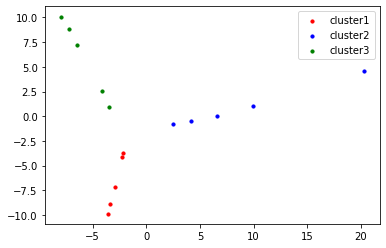

In [23]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0,0], principalDf.iloc[kmeans.labels_ == 0,1], s=10, c='red', label='cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1,0], principalDf.iloc[kmeans.labels_ == 1,1], s=10, c='blue', label='cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2,0], principalDf.iloc[kmeans.labels_ == 2,1], s=10, c='green', label='cluster3')

plt.legend()

***

K-평균 분석은 각 데이터들의 공간상 평균(중심)을 계산할 수 있는 경우에만 적용할 수 있다. 즉 데이터에 정성적인 속성(ex. 지역)일 경우 속성값(ex. 서울, 부산 등)이 명목형으로 나오기 때문에 평균을 정의하기 어렵다. 이런 경우 클러스터의 중심을 평균이 아닌 최빈값으로 계산하기도 한다.
  
데이터의 속성이 특정 단어라면 속성값은 단어에 대한 빈도 혹은 기타 가중치이므로 K-평균 알고리즘을 문제없이 적용할 수 있다.

***

#### 4.2.1.2 k-대푯값 군집 분석

k-평균 분석은 평균의 특성을 반영하므로 이상치(Outlier)에 매우 민감하다. 즉 다른 오브젝트에 비해 거리가 먼 오브젝트가 있을 시 centroid를 계산할 때 평균값이 크게 왜곡될 수 있다. 한 번 잘못 계산된 centroid는 그 다음 스텝에도 영향을 주어 전체적으로 악영향을 끼친다.
  
K-대푯값 분석은 K-평균 분석의 이상치에 대한 민감성을 보완한 알고리즘이다. 즉 클러스터의 중심을 구할 때 오브젝트의 평균이 아닌 다른 대표 오브젝트를 뽑는다.

>< K-대푯값 군집 분석 알고리즘 >    
>
>**입력값**
1. k : 군집 수  
2. D : n개의 데이터 오브젝트를 포함하는 집합  
>
>**출력값** : k개의 군집  
>  
>**알고리즘**  
1. n개의 데이터 오브젝트 중 대표 오브젝트를 k개 지정한다.
2. k개의 대표 오브젝트를 지정 후, 나머지 오브젝트들을 유사성이 가장 높은 대표 오브젝트에 배정한다. 거리척도는 유사성을 활용한다.
3. 대푯값이 아닌 다른 오브젝트 하나를 임의 대푯값으로 지정한다.
4. 본래의 대푯값과 임의의 대푯값 간의 총비용을 비교한다.$$ E = \sum_{i=1}^k \sum_{p \in C_i} dist(p,o_i) $$
   E는 총 비용이며 클러스터의 대표 오브젝트를 가리킨다.
5. 만약 임의의 대푯값의 총비용이 더 작을 경우 임의의 대푯값을 새로운 대푯값으로 대체한다.
6. 변화가 없을때까지 2~5단계를 반복한다.

 K-대푯값 군집 분석은 이상치에는 덜 민감하나, 분석 시 반복 횟수가 많아진다. 특히 데이터 수가 많아지면 분석 시간이 대폭 증가한다.

***

**< K-대푯값 군집 분석 예제 : 기사 분석하기 >**  

K-평균 분석에서 사용했던 데이터를 이용한다.

In [26]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

In [39]:
hannanum = Hannanum()
Data = Data = pd.read_csv('E:\\text-mining\\tmwithpython-master\\군집분석데이터.csv', engine="python")

docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

# kmedoids_instance = kmedoids.kmedoids(df.as_matrix(), initial_index_medoids=np.random.randint(15, size=3))
# kmedoids_instance.process()
# clusters = kmedoids_instance.get_cluster()

# clusters

**주석처리한 부분에서 오류 발생. kmedoids를 지원하는 다른 라이브러리를 이용해볼 것.**

***

### 4.2.2 구조적 군집 분석

- `분할 군집 분석` : 데이터 집합을 몇 개의 배타적 그룹으로 분할
- `구조적 군집 분석` : 데이터 집합을 트리 형태의 군집으로 분할. 즉 데이터를 하위 그룹으로 나누어 위계를 만든다. ex) 회사의 조직도

#### 4.2.2.1 거리 측정법


구조적 군집 분석은 두 군집간 `거리`를 측정하면서 계층적으로 가까운 군집끼리 서로 묶이며 이루어진다. 해당 알고리즘에 쓰이는 `거리`들은 다음과 같다.

$$ 최소거리 : \underset{p_i \in C_i, p_j \in C_j}{\min}|p_j - p_j|$$  
$$ 최대거리 : \underset{p_i \in C_i, p_j \in C_j}{\max}|p_j - p_j|$$  
$$ 평균 거리 : |m_i - m_j|$$  
$$ 거리 평균 : {1 \over n_i n_j}\underset{p_i \in C_i, p_j \in C_j}{\sum} |p_i - p_j|$$  
$$ \mathrm{ward} : {(m_i - m_j)^2 \over {1 \over n_A}+{1 \over n_B}}$$

- $p$ : 오브젝트 한 점, $m$ : 군집의 평균값, $C$ : 클러스터(군집), $n$ : 클러스터에 포함된 오브젝트 개수

< 거리별 특징 >
- 최대, 최소거리 : 이상치에 민감
- 평균거리 : 계산이 간편함
- 거리평균 : 벡터를 계산하기 어려운 정성데이터에도 적용 가능
- ward : 이상치, 노이즈에 덜 민감하며 비슷한 크기의 군집끼리 묶어줌.

***

**< 구조적 군집 분석 예제 : 기사 분석하기 >**  

K-평균 분석에서 사용했던 데이터를 이용한다.

In [41]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [42]:
hannanum = Hannanum()
Data = Data = pd.read_csv('E:\\text-mining\\tmwithpython-master\\군집분석데이터.csv', engine="python")

In [44]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
    
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

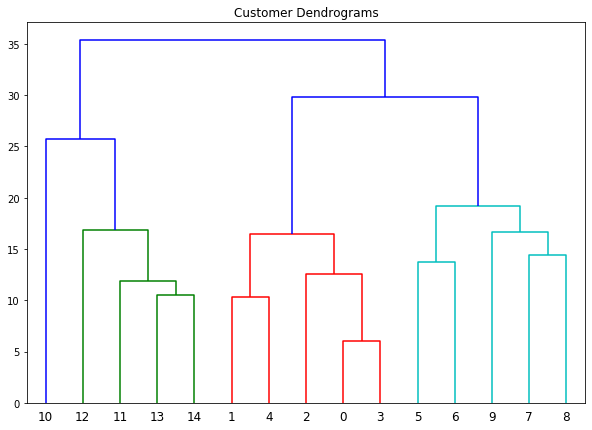

In [47]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

# 4.3 토픽 모델링

`토픽 모델링`은 구조화되지 않은 방대한 문헌집단에서 주제를 찾아내기 위한 통계적 추론 알고리즘이다.
- 맥락과 관련된 단어들을 이용하여 의미를 가진 단어들을 클러스터링하여 주제를 추론한다.
- 감성 분석과 같은 타 분석 모델과 혼합하여 자주 쓰인다.
- 표, 단어구름, 단어 네트워크, 연도별 그래프 등 다양한 시각화 기법과 결합했을 때 더 효과적이다.

### 4.3.1 LDA(Latent Dirichlet Allocation)

LDA는 토픽 모델링 기법 중 텍스트 마이닝 분석에서 가장 많이 활용되는 초창기 모델이다. LDA에서는 단어의 교환성을 가정한다.

- `교환성` : 단어의 순서는 고려하지 않고 오직 단어의 유무만이 중요하다는 가정

단어들의 순서를 고려하지 않으므로 단어의 빈도수만으로 모델이 표현된다.
  
LDA모형은 `gensim` 라이브러리를 통해 구현한다.

***

< 예제 : gensim으로 LDA 모형 만들기 >

영어 문장 10개를 각각 하나의 문서로 보고 토픽 개수 3으로 토픽 모델링을 수행한다.

In [62]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [64]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

texts = []

for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

# 문서의 단어들을 사전형으로 바꿈
dictionary = corpora.Dictionary(texts)

# 문서-단어 매트릭스 형성
corpus = [dictionary.doc2bow(text) for text in texts]

# topic 개수=3으로 지정
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary)

# 토픽별로 5개씩 단어 출력
ldamodel.print_topics(num_words=5)

[(0,
  '0.045*"drive" + 0.044*"brother" + 0.044*"mother" + 0.026*"pressur" + 0.025*"feel"'),
 (1,
  '0.070*"data" + 0.035*"big" + 0.024*"varieti" + 0.023*"volum" + 0.022*"veloc"'),
 (2,
  '0.046*"good" + 0.045*"brocolli" + 0.042*"data" + 0.032*"health" + 0.032*"eat"')]

출력된 결과는 토픽별 단어 5개이고 왼쪽에 곱해진 숫자는 가중치이다. 해당 단어가 토픽에서 설명하는 비중을 나타낸다.

In [66]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.037754346), (1, 0.03348657), (2, 0.9287591)]

출력된 결과는 0번째 문서(문장)에서의 각 토픽 분포이다. 모든 토픽 분포의 확률 합은 1이 된다.

***

### 4.3.2 LDA 토픽 개수 지정

토픽 모델링의 토픽 개수는 사용자가 직접 입력한다. 토픽 개수는 임의로 정할수도 있지만 통계적 방법을 이용할 수도 있다. 통계적 방법은 크게 `perplexity`, `topic coherence` 두 가지가 있다.
  
perplexity는 특정 확률 모델이 실측값을 얼마나 잘 예측하는지 평가할때 이용하는 수치로써 정의는 다음과 같다.

$$ perp = 2^H(p) $$

$H(p)$는 $p$의 정보 엔트로피 값으로 LDA 과정에서 다음과 같은 식으로 바꿔서 계산한다.

$$ perp = 2^{-{\underset{w}{\sum} LL(w) \over N}} $$

$LL(w)$는 로그 가능도로써, 토픽 모델 내의 특정 단어가 해당 주제에 할당될 확률값에 로그를 취한 값이다. 그 값을 모두 더해 전체 단어 개수 $N$으로 나눈 것이므로 $H(p)$는 로그 가능도의 평균에 -를 붙인 값이 된다.

LDA알고리즘은 내부적으로 다음 확률값들을 계산하므로 확률모델을 평가할 때 사용하는 척도인 perplexity를 이용하는건 자연스럽다.

> - $p(topic\ t\ |\ document\ d)$ : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율(=문헌 내 주제 출현 확률)
> - $p(word\ w\ |\ topic\ t)$ : 토픽 t가 할당된 단어들 중 w의 비율(=주제 내 용어 출현 확률)

토픽 개수(혹은 샘플링 반복 횟수)를 늘릴수록 perplexcity는 감소하는 경향을 보인다. 그러다가 특정 토픽 개수 지점을 지나면 더이상 감소하지 않고 수렴하는 지점이 등장하는데 이때의 perplexity가 해당 모델의 최종 perplexity이다.
  
perplexity가 작을수록 해당 토픽 모델은 실제 문헌 결과를 잘 반영하므로 학습이 잘 되었다고 평가할 수 있다.
  
topic coherence는 실제로 사람이 해석하기에 적합한 평가 도구이다. perplexity는 학습 정도를 반영하나 그 결과가  사람이 해석하기 좋은 것과는 무관하다. topic coherence는 이러한 관점에서 제시된 평가 도구라 볼 수 있다.
  
우선 토픽 모델링 결과로 나온 주제들에 대해 각각의 주제에서 상위 N개의 단어들을 뽑는다. 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어들이 모여있게 된다. 따라서 상위 단어들 간의 유사도를 계산하여 평균을 구하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있다.

***

**< 예제 : perplexity, topic coherence 구하기 >**

In [67]:
from gensim.models import CoherenceModel

In [69]:
print('\nPerlexity: ', ldamodel.log_perplexity(corpus))

# 상위 10개(topn=10)의 단어를 이용하여 유사도를 계산
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perlexity:  -5.031003521948025

Coherence Score:  0.42792780362496213


토픽의 개수를 달리하면서 각 지표들을 계산해보자.

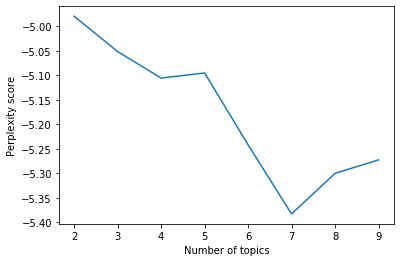

In [70]:
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

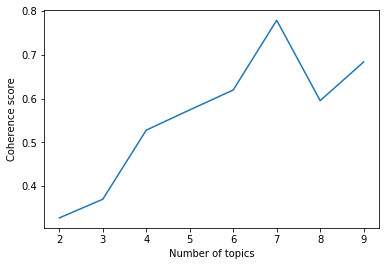

In [71]:
coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.show()